In [65]:
import numpy as np
from sklearn.metrics import (roc_auc_score, mean_absolute_error, 
mean_squared_error, average_precision_score, confusion_matrix,
classification_report)
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import random
from sklearn import svm, datasets

In [66]:
df = pd.read_csv('https://bidtime.s3.amazonaws.com/Avazu/train/avazu_sample_10k.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 25 columns):
Unnamed: 0          10001 non-null int64
id                  10001 non-null uint64
click               10001 non-null int64
hour                10001 non-null int64
C1                  10001 non-null int64
banner_pos          10001 non-null int64
site_id             10001 non-null object
site_domain         10001 non-null object
site_category       10001 non-null object
app_id              10001 non-null object
app_domain          10001 non-null object
app_category        10001 non-null object
device_id           10001 non-null object
device_ip           10001 non-null object
device_model        10001 non-null object
device_type         10001 non-null int64
device_conn_type    10001 non-null int64
C14                 10001 non-null int64
C15                 10001 non-null int64
C16                 10001 non-null int64
C17                 10001 non-null int64
C18                 

In [68]:
selected_columns =['C1','site_domain','app_id','app_domain','site_category','banner_pos','device_type','device_conn_type','C14','C15','C16','C17','C18','C19']
# Please put your code here to define the data matrix X and y
X = df.loc[:,selected_columns]
y = df.click

In [69]:
#X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
#y = df['click'].values

In [70]:
X= pd.get_dummies(X)

In [71]:
Xnew.head()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,site_category_70fb0e29,site_category_72722551,site_category_75fa27f6,site_category_76b2941d,site_category_8fd0aea4,site_category_a818d37a,site_category_c0dd3be3,site_category_dedf689d,site_category_f028772b,site_category_f66779e6
0,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,1,0
1,1005,0,1,0,19743,320,50,2264,3,427,...,0,0,0,0,0,0,0,0,0,0
2,1005,0,1,0,18993,320,50,2161,0,35,...,0,0,0,0,0,0,0,0,0,0
3,1005,0,1,0,15701,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
4,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0


In [72]:
n_train = 999 
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

In [73]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.30, random_state=50)

C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.


              precision    recall  f1-score   support

           0       0.87      0.65      0.74      7409
           1       0.25      0.55      0.35      1593

   micro avg       0.63      0.63      0.63      9002
   macro avg       0.56      0.60      0.54      9002
weighted avg       0.76      0.63      0.67      9002

0.1557741533240242
[[4803 2606]
 [ 716  877]]
Normalized confusion matrix
[[0.64826562 0.35173438]
 [0.44946642 0.55053358]]


C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


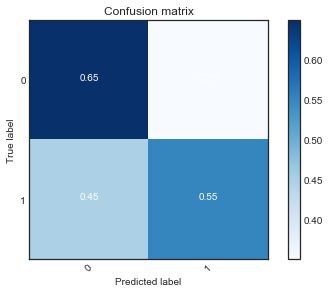

In [74]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import svm
from sklearn import preprocessing

%matplotlib inline
plt.style.use('seaborn-white')

clf = svm.LinearSVC(class_weight='balanced')
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
print(classification_report(y_test,y_pred))
print(matthews_corrcoef(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)
plt.show();




In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Cs = [0.01,0.1,1,10,100,1000]
parameters = {'C':Cs}

svc = LinearSVC(penalty='l1', dual = False)
clf_regsvm = GridSearchCV(svc, parameters,return_train_score=True)
clf_regsvm.fit(X_train, y_train)
print('best parameters:',clf_regsvm.best_params_,',testing accuracy:',clf_regsvm.best_estimator_.score(X_test,y_test))
    
    

    


C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Thier\

best parameters: {'C': 0.01} ,testing accuracy: 0.8230393245945345


In [76]:
clf_l1= svm.LinearSVC(penalty= 'l1', dual = False, class_weight = 'balanced' , C=0.01)
clf_l1.fit(X_train, y_train)
y_predl1 = clf_l1.predict(X_test)
print(classification_report(y_test,y_predl1))
print(matthews_corrcoef(y_test,y_predl1))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      7409
           1       0.26      0.51      0.34      1593

   micro avg       0.65      0.65      0.65      9002
   macro avg       0.56      0.60      0.55      9002
weighted avg       0.76      0.65      0.69      9002

0.15482704204503467


[[5050 2359]
 [ 777  816]]
Normalized confusion matrix
[[0.68160346 0.31839654]
 [0.48775895 0.51224105]]


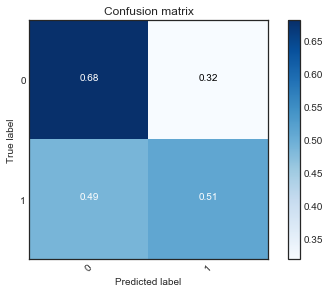

In [77]:
cm = confusion_matrix(y_test, y_predl1)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)
plt.show();


In [78]:
svc2 = svm.LinearSVC(penalty='l2')
clf_l2 = GridSearchCV(svc2, parameters,return_train_score=True)
clf_l2.fit(X_train, y_train)
print('best parameters:',clf_l2.best_params_,',testing accuracy:',clf_l2.best_estimator_.score(X_test,y_test))

C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Thier\

best parameters: {'C': 1} ,testing accuracy: 0.7934903354810042


C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [79]:
clf_l2= svm.LinearSVC(penalty= 'l2', class_weight = 'balanced' , C=0.01)
clf_l2.fit(X_train, y_train)
y_predl2 = clf_l2.predict(X_test)
print(classification_report(y_test,y_predl2))
print(matthews_corrcoef(y_test,y_predl2))

              precision    recall  f1-score   support

           0       0.87      0.63      0.74      7409
           1       0.25      0.57      0.35      1593

   micro avg       0.62      0.62      0.62      9002
   macro avg       0.56      0.60      0.54      9002
weighted avg       0.76      0.62      0.67      9002

0.16085942094286593


[[4703 2706]
 [ 682  911]]
Normalized confusion matrix
[[0.63476852 0.36523148]
 [0.42812304 0.57187696]]


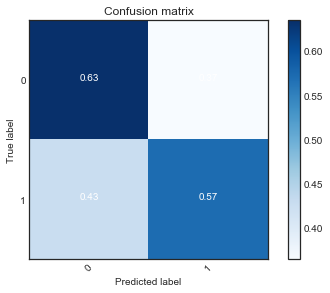

In [80]:
cm = confusion_matrix(y_test, y_predl2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)
plt.show();



In [81]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.30, random_state=50)

C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[6989  420]
 [1375  218]]
Normalized confusion matrix
[[0.94331219 0.05668781]
 [0.86315129 0.13684871]]


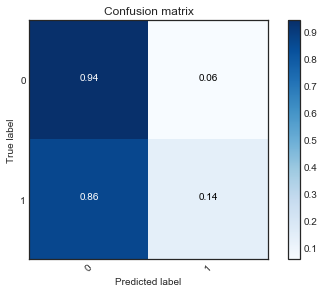

In [82]:
import sklearn.linear_model as skl_lm

clf = skl_lm.LogisticRegression(C=1e10,tol=1e-9)
# C is the inverse of regularization strength, here we don't need regularization since we have so many data
# Set it to very big 
clf.fit(X_train,y_train)
clf.coef_


from sklearn.metrics import confusion_matrix
import itertools

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)


from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.622777


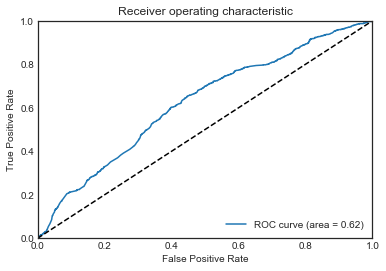

In [83]:
ROC(y_test,y_score)

In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
print(classification_report(y_test,y_pred))

print(matthews_corrcoef(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7409
           1       0.34      0.14      0.20      1593

   micro avg       0.80      0.80      0.80      9002
   macro avg       0.59      0.54      0.54      9002
weighted avg       0.75      0.80      0.76      9002

0.11921555469241284


In [85]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.25


Text(0.5,1,'2-class Precision-Recall curve: AP=0.25')

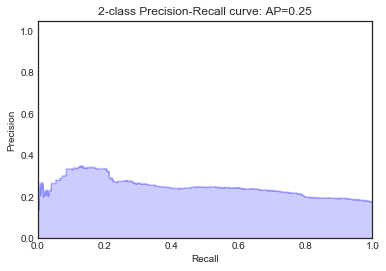

In [86]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [87]:
from sklearn.preprocessing import StandardScaler

# preprocess dataset, split into training and test part
XRF = StandardScaler().fit_transform(Xnew)
X_train, X_test, y_train, y_test = train_test_split(XRF, y, test_size=.4)

C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [88]:
from sklearn.ensemble import RandomForestClassifier


max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]
parameters = {'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features}


model =  RandomForestClassifier(max_depth=10, n_estimators=100, max_features=1)
clfRF = GridSearchCV(model, parameters,return_train_score=True)
clfRF.fit(X_train, y_train)
score = clfRF.score(X_test, y_test)
clfRF.fit(X_train, y_train)
print('Accuracy:{},Best parameters:{}, feature importance:{}'.format(score,clfRF.best_params_,clfRF.best_estimator_.feature_importances_))


C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy:0.8207948012996751,Best parameters:{'max_depth': 4, 'max_features': 0.5, 'n_estimators': 32}, feature importance:[8.47574818e-03 1.32847105e-03 7.29281393e-03 1.34436891e-02
 1.99084321e-01 3.94680588e-02 1.44095945e-01 5.87883263e-02
 1.26351947e-02 1.34694124e-01 0.00000000e+00 0.00000000e+00
 3.06315680e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.23508901e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.19517745e-02
 0.00000000e+00 1.44404875e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [89]:
clfRF = RandomForestClassifier(max_depth=16, n_estimators=32, max_features=.3)
clfRF.fit(X_train, y_train)
y_pred= clfRF.predict(X_test)

[[3217   55]
 [ 677   52]]
Normalized confusion matrix
[[0.98319071 0.01680929]
 [0.92866941 0.07133059]]


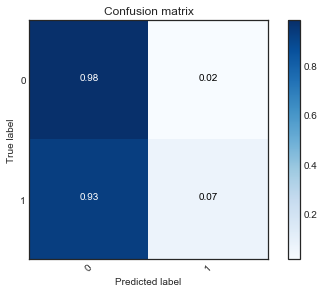

In [90]:
y_predRF = clfRF.predict(X_test)
cm = confusion_matrix(y_test, y_predRF)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)


from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.680048


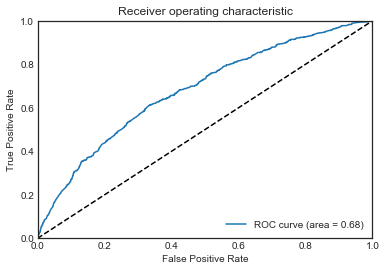

In [91]:
y_scoreRF = clfRF.predict_proba(X_test)[:,1]
ROC(y_test,y_scoreRF)